## Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline## Read Data

UsageError: unrecognized arguments: Read Data


## Read Data

In [3]:
Dresses_Attribute = pd.read_csv("Attribute DataSet.csv")
Dresses_Attribute.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [4]:
Dresses_Attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
Dress_ID          500 non-null int64
Style             500 non-null object
Price             498 non-null object
Rating            500 non-null float64
Size              500 non-null object
Season            498 non-null object
NeckLine          497 non-null object
SleeveLength      498 non-null object
waiseline         413 non-null object
Material          372 non-null object
FabricType        234 non-null object
Decoration        264 non-null object
Pattern Type      391 non-null object
Recommendation    500 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


## Data Pre-process

In [5]:
X = Dresses_Attribute.iloc[:,[1,2,3,4,5,6,7,8]]
y = Dresses_Attribute["Recommendation"]

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# fill na 
X = X.fillna("None")

In [6]:
#one hot and Feature Scaling
X_category = X.iloc[:,[0,1,3,4,5,6,7]]
X_category = pd.get_dummies(X_category)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_continuous = X[['Rating']]
# X_continuous = pd.DataFrame(sc.fit_transform(X[['Rating']]))

In [7]:
X_preprocess = pd.concat([X_category,X_continuous],axis=1)
X_preprocess.rename(columns={0:'Rating'}, inplace=True)

In [8]:
X_category.shape, X_continuous.shape,X_preprocess.shape, y.shape

((500, 77), (500, 1), (500, 78), (500,))

In [9]:
X_preprocess.head()

,Style_Brief,Style_Casual,Style_Flare,Style_Novelty,Style_OL,Style_Sexy,Style_bohemian,Style_cute,Style_fashion,Style_party,...,SleeveLength_threequater,SleeveLength_thressqatar,SleeveLength_turndowncollor,SleeveLength_urndowncollor,waiseline_None,waiseline_dropped,waiseline_empire,waiseline_natural,waiseline_princess,Rating
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.6
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.6
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,4.5


In [10]:
# finished_data = pd.concat([X_preprocess,pd.DataFrame(y)],axis =1 )
# finished_data.to_csv("Dress_Attribute.csv",index=False)

## Split Data

In [128]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# train and test
X_train, X_test, y_train, y_test = train_test_split(X_preprocess, y, test_size=0.1, random_state=1,stratify = y)
# split for valid
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1,stratify = y_train)

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape,

((405, 78), (45, 78), (50, 78), (405,), (45,), (50,))

In [129]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([235, 170], dtype=int64))

In [130]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([29, 21], dtype=int64))

In [131]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([26, 19], dtype=int64))

## Train Model

In [132]:
%env KERAS_BACKEND = tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD,adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

env: KERAS_BACKEND=tensorflow


In [133]:
def FlattenWeights(weights):
        """
        flatten weights
        
        param weights: keras神經網路的權重格式:nparray包在list中
        return WeightsStrucure : 神經網路各層的權重shape包在list中，unflatten時會用到
        return FlattenedWeights : 一維list包含所有的權重
        """
        WeightsStrucure = []
        FlattenedWeights = []
        for i_layer in weights:
            WeightsStrucure.append(i_layer.shape)
            if len(i_layer.shape) == 1 :# 該層權重的shape為一維 e.g. (15,)      
                FlattenedWeights.extend(i_layer)
            else :# 該層權重的shape為二維 e.g. (30, 15)  
                for i_links in i_layer:
                    FlattenedWeights.extend(i_links)
        return WeightsStrucure, FlattenedWeights

def UnflattenWeights(WeightsStrucure, ModifiedWeights):
    """
    Unflatten(回復成原本的結構) weights  

    param WeightsStrucure : 神經網路各層的權重shape包在list中
    param ModifiedWeights : 一維list包含所有meteHeuristic修改過的權重
    return: keras神經網路的權重格式:nparray包在list中
    """
    UnflattenWeights = []
    i_index = 0 
    for i_layer in WeightsStrucure:
        if len(i_layer) == 1 : # 該層權重的shape為一維 e.g. (15,)      
            TempList = ModifiedWeights[i_index:(i_index + i_layer[0])]
            TempList = np.asarray(TempList)
            i_index = i_index + i_layer[0]
        else : # 該層權重的shape為二維 e.g. (30, 15)  
            TempList = ModifiedWeights[i_index:(i_index + (i_layer[0]*i_layer[1]))]
            TempList = np.reshape(TempList, i_layer )
            i_index = i_index + (i_layer[0]*i_layer[1])
        UnflattenWeights.append(TempList)
    return UnflattenWeights  

def auc(model,X,y):
    from sklearn.metrics import roc_auc_score
    y_pred = model.predict(X)
    auc = roc_auc_score(y, y_pred)
    return auc
def score(model,X,y):
    # Predicting the Test set results
    y_pred = model.predict(X)
    y_pred = (y_pred > 0.5)

    cm = confusion_matrix(y, y_pred)
    miss_rate = 1 - ((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))

    # calculate loss
#     loss = log_loss(y_val,y_pred)
    return miss_rate
    
def Optimize_SA(model = None , score = None , initT = 1000, minT = 1 , iterL = 5000 , delta = 0.95, k = 1, init_weights = None, structure = None):
    old_loss = score(model,X_val,y_val)
    nowt = initT 
    # start SA!
    while nowt > minT:
        for i in range(iterL):
            # 初始舊權重計算分數
            # 製作新的權重
            xnew = init_weights + (np.random.rand(len(init_weights)) - 0.5)
            process_weights = UnflattenWeights(structure, xnew )
            model.set_weights(process_weights)
            new_loss = score(model,X_val,y_val)
            # 計算分數差異
            res = new_loss - old_loss
            if res < 0:
                init_weights = xnew
                old_loss = new_loss
            else:
                p = np.exp(-res / (k * nowt))
                if np.random.rand() < p:
                    init_weights = xnew
                    old_loss = new_loss
                else:
                    pass
            nowt = nowt * delta
    return model

## Build Network!

In [192]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=78))
# Adding dropout to prevent overfitting
# classifier.add(Dropout(p=0.1))
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
# classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                1264      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________


c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=78, units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':


In [193]:
# Fit initial model 
# early stoppping
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
# classifier.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=100,epochs=100, verbose=0, callbacks=[early_stopping])
classifier.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=100,epochs=100, verbose=0)

## Get Model details & Score 

In [194]:
print(classifier.history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [195]:
auc(classifier,X_train,y_train)

0.8048811013767208

In [196]:
score(classifier,X_train,y_train)

0.2617283950617284

In [197]:
auc(classifier,X_val,y_val)

0.5222672064777327

In [198]:
score(classifier,X_val,y_val)

0.5111111111111111

In [199]:
auc(classifier,X_test,y_test)

0.6075533661740559

In [200]:
score(classifier,X_test,y_test)

0.36

## Plot history

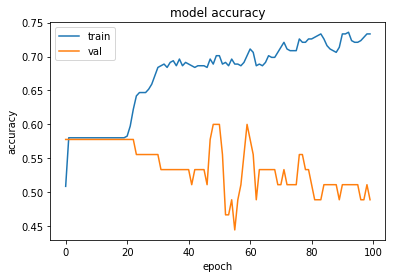

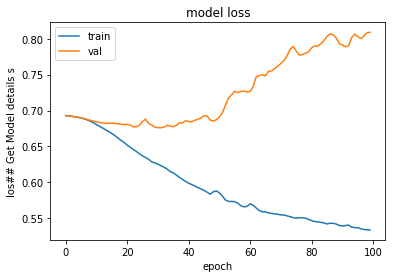

In [201]:
# summarize history for accuracy
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('los## Get Model details s')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## SA Optimization

In [202]:
# Get initial weights
init_weights = classifier.get_weights()
# preserve model and flatten weight
structure, weights =FlattenWeights(init_weights) # 拉平初始權重

In [203]:
model = classifier

In [204]:
initT = 1000
minT = 1 
iterL = 5000
delta = 0.95
k = 1
init_weights = weights

In [205]:
old_loss = score(model,X_train,y_train)
nowt = initT 
# start SA!
while nowt > minT:
    for i in range(iterL):
        # 初始舊權重計算分數
        # 製作新的權重
        xnew = init_weights + (np.random.rand(len(init_weights)) - 0.8)
        process_weights = UnflattenWeights(structure, xnew )
        model.set_weights(process_weights)
        new_loss = score(model,X_train,y_train)
        print(new_loss)
        # 計算分數差異
        res = new_loss - old_loss
        print(res)
        if res < 0:
            print("less")
            init_weights = xnew
            old_loss = new_loss
        else:
            print("prob function")
            p = np.exp(-res / (k * nowt))
            if np.random.rand() < p:
                init_weights = xnew
                old_loss = new_loss
            else:
                pass
        nowt = nowt * delta

0.3925925925925926
0.1308641975308642
prob function
0.41975308641975306
0.02716049382716046
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306


0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob functio

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.41975308641975306
0.0
prob function
0.4197530864

In [206]:
score(model,X_train,y_train)

0.41975308641975306

In [207]:
score(model,X_val,y_val)

0.4222222222222223

In [208]:
auc(classifier,X_val,y_val)

0.5

In [209]:
score(model,X_test,y_test)

0.42000000000000004

In [210]:
auc(classifier,X_test,y_test)

0.5

### train降低 test變高，感覺要做validation

In [88]:
def loop_optimization():
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=78))
    # Adding dropout to prevent overfitting
#     classifier.add(Dropout(p=0.1))
    # Adding the second hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
#     classifier.add(Dropout(p=0.1))
    # Adding the output layer
    classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Fit initial model 
    # early stoppping
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
    classifier.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=100,epochs=100, verbose=0, callbacks=[early_stopping])
    
    print("original test:"+str(score(classifier,X_test,y_test)))
    
    # Get initial weights
    init_weights = classifier.get_weights()
    # Get initila score
    init_misclassify_rate = score(classifier,X_val,y_val)
    # preserve model and flatten weight
    init_model = classifier # 保存舊模型
    structure, weights =FlattenWeights(init_weights) # 拉平初始權重
    
    for i in range(10):
        # SA Optimization loop 5000 round
        SA_Model = Optimize_SA(model = classifier, score = score, init_weights= weights, structure= structure,k=1)
        SA_misclassify_rate = score(classifier,X_val,y_val)

        if SA_misclassify_rate < init_misclassify_rate :
            # get SA weight
            print("SA-"+str(i)+"-improve! ==> "+str(SA_misclassify_rate))
            print(score(classifier,X_test,y_test))
            
            init_weights = classifier.get_weights()
            structure, weights =FlattenWeights(init_weights) # 拉平初始權重
            init_misclassify_rate = SA_misclassify_rate
        else :
            print("SA-"+str(i)+"-fail! ==> "+str(SA_misclassify_rate))
            print(score(classifier,X_test,y_test))
            
            # recover the original model
            classifier.set_weights(init_weights)
            structure, weights =FlattenWeights(init_weights) # 拉平初始權重
        if i < 9 :    
            # Adam re-training
            classifier.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=100,epochs=100, verbose=0, callbacks=[early_stopping])

    final_score = score(classifier,X_val,y_val)
    
    return final_score, classifier

In [89]:
final_score, classifier = loop_optimization()

c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=78, units=16, kernel_initializer="uniform")`
  """
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Epoch 00055: early stopping
original test:0.38
SA-0-improve! ==> 0.23750000000000004
0.4
Epoch 00021: early stopping
SA-1-improve! ==> 0.19999999999999996
0.48
Epoch 00021: early stopping
SA-2-improve! ==> 0.17500000000000004
0.48
Epoch 00021: early stopping
SA-3-fail! ==> 0.1875
0.51
Epoch 00021: early stopping
SA-4-fail! ==> 0.19999999999999996
0.48
Epoch 00021: early stopping
SA-5-fail! ==> 0.17500000000000004
0.43000000000000005
Epoch 00021: early stopping
SA-6-improve! ==> 0.15000000000000002
0.43999999999999995
Epoch 00021: early stopping
SA-7-fail! ==> 0.16249999999999998
0.47
Epoch 00021: early stopping
SA-8-fail! ==> 0.15000000000000002
0.41000000000000003
Epoch 00021: early stopping
SA-9-improve! ==> 0.11250000000000004
0.48


In [90]:
final_score

0.11250000000000004

In [91]:
score(classifier,X_test,y_test)

0.48

## Console